In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 


In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [17]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
targets.shape

(506,)

In [10]:
#data = pd.concat([features, pd.Series(targets,name = 'MEDV')], axis = 1)
#data.head()

In [19]:
# No missing values
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [20]:
# Splitting the boston dataset into test and training dataset
x_train,x_test,y_train,y_test = train_test_split(features, targets, test_size = 0.2, random_state = 1)

##  Applying Random Forest model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

C:\Users\shibi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
rf1 = RandomForestRegressor(random_state = 10)
rf1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [38]:
feature_importances = pd.DataFrame({'Feature':x_train.columns,'Importance':(rf1.feature_importances_)*100})
feature_importances = feature_importances.sort_values('Importance').set_index('Feature')
print(feature_importances)

         Importance
Feature            
CHAS       0.041481
ZN         0.097467
RAD        0.243102
AGE        0.907382
TAX        1.144249
INDUS      1.208617
B          1.644829
PTRATIO    2.317208
NOX        2.820491
CRIM       3.539641
DIS        7.952347
RM        27.666320
LSTAT     50.416866


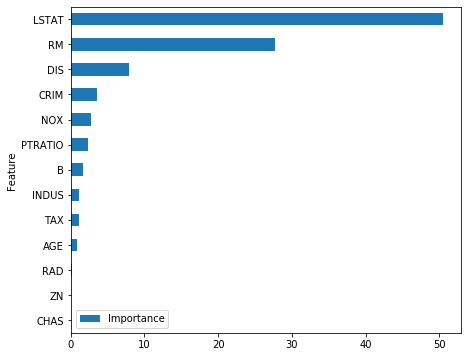

In [39]:
feature_importances.plot(kind='barh',figsize=(7,6))

In [66]:
pred1 = rf1.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred1))
# Explained variance score: 1 is perfect prediction
score=r2_score(y_test,pred1)
print("r2 score: %f" % score)

Mean squared error: 9.236949
r2 score: 0.906535


In [68]:
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler().fit(x_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

x_train1 = scalerx.transform(x_train)
y_train1 = scalery.transform(y_train.reshape(-1, 1))
x_test1 = scalerx.transform(x_test)
y_test1 = scalery.transform(y_test.reshape(-1, 1))



rf2 = RandomForestRegressor(max_features = 6, random_state = 10, n_estimators = 500)
rf2.fit(x_train1, y_train1)
pred2 = rf2.predict(x_test1)
# The mean squared error
print("Mean squared error after normalizing data with 6 features: %f" % mean_squared_error(y_test1, pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score after normalizing data with 6 features: %f' % r2_score(y_test1, pred2))

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Mean squared error after normalizing data with 6 features: 0.114323
Variance score after normalizing data with 6 features: 0.906552


In [69]:
# We observed that score improved and Mean squared error reduced after Normalizing the data

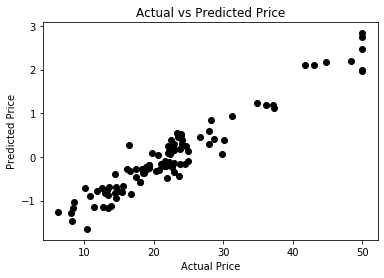

In [71]:
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.scatter(y_test, pred2, color='black')
plt.show()